In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pca
import sklearn.datasets

Linear example

eigen values =  [1.1219784767883865, 0.10491233730572352]
w0 =  [0.48726105 0.97989309]
w1 =  [0.46908293 0.88315412]
w2 =  [-0.88315412  0.46908293]
1st eigen value: 91.45%
2nd eigen value: 8.55%


/tmp/ipykernel_43110/776903192.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean=mu, cov=sigma, size=N)


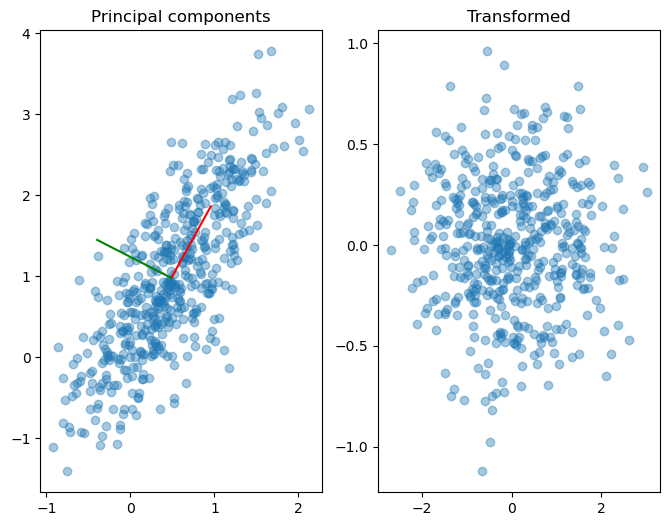

In [2]:
N = 500
mu = np.array([0.5, 1.0])
sigma = np.array([[0.33, 0.46], [0.33, 0.76]])
X = np.random.multivariate_normal(mean=mu, cov=sigma, size=N)

n_components = 2
model = pca.PCA(n_components=n_components)
model.fit(X)
X_transformed = model.transform(X)
print("eigen values = ", model.eigenvalues.tolist())
w0 = model.centered
w1 = model.eigenvectors[:, 0]
w2 = model.eigenvectors[:, 1]
print("w0 = ", w0)
print("w1 = ", w1)
print("w2 = ", w2)
print("1st eigen value: %.2f%%" % (model.eigenvalues[0] / model.eigenvalues.sum()*100))
print("2nd eigen value: %.2f%%" % (model.eigenvalues[1] / model.eigenvalues.sum()*100))

plt.figure(figsize=(8,6))
ax = plt.subplot(1,2,1)
ax.scatter(X[:, 0], X[:, 1], alpha=0.4)
ax.plot([w0[0],w0[0]+w1[0]], [w0[1], w0[1]+w1[1]], color="red")
ax.plot([w0[0],w0[0]+w2[0]], [w0[1], w0[1]+w2[1]], color="green")
ax.set_title("Principal components")

ax = plt.subplot(1,2,2)
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.4)
ax.set_title("Transformed")

plt.show()

Moons dataset

eigen values =  [0.8202310770117742, 0.18043209874261204]
w0 =  [0.5  0.25]
w1 =  [-0.95176645  0.30682345]
w2 =  [-0.30682345 -0.95176645]
1st eigen value: 81.97%
2nd eigen value: 18.03%


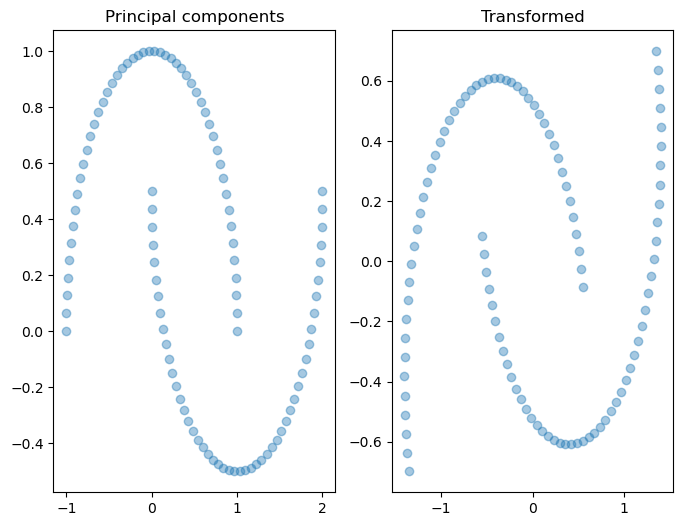

In [3]:
N = 100
X, y = sklearn.datasets.make_moons(N, random_state=42)

n_components = 2
model = pca.PCA(n_components=n_components)
model.fit(X)
X_transformed = model.transform(X)
print("eigen values = ", model.eigenvalues.tolist())
w0 = model.centered
w1 = model.eigenvectors[:, 0]
w2 = model.eigenvectors[:, 1]
print("w0 = ", w0)
print("w1 = ", w1)
print("w2 = ", w2)
print("1st eigen value: %.2f%%" % (model.eigenvalues[0] / model.eigenvalues.sum()*100))
print("2nd eigen value: %.2f%%" % (model.eigenvalues[1] / model.eigenvalues.sum()*100))

plt.figure(figsize=(8,6))

ax = plt.subplot(1,2,1)
ax.scatter(X[:, 0], X[:, 1], alpha=0.4)
# ax.plot([w0[0],w0[0]+w1[0]], [w0[1], w0[1]+w1[1]], color="red")
# ax.plot([w0[0],w0[0]+w2[0]], [w0[1], w0[1]+w2[1]], color="green")
ax.set_title("Principal components")

ax = plt.subplot(1,2,2)
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.4)
ax.set_title("Transformed")

plt.show()


MNIST dataset

2 first eigen values =  [5.194342027261681, 3.897794475861135]
1st eigen value: 9.87%
2nd eigen value: 7.40%
variance kept with 10 components: 49.35%


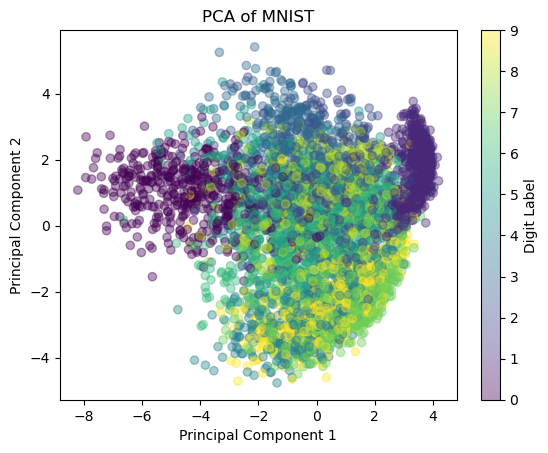

In [4]:
N = 5000
X, y = sklearn.datasets.fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X = X[:N] / 255.
y = y[:N]
y = np.array(y, dtype=int)

n_components = 2
model = pca.PCA(n_components=n_components)
model.fit(X)

X_transformed = model.transform(X)
print("2 first eigen values = ", model.eigenvalues.tolist()[:2])
w0 = model.centered
w1 = model.eigenvectors[:, 0]
w2 = model.eigenvectors[:, 1]
print("1st eigen value: %.2f%%" % (model.eigenvalues[0] / model.eigenvalues.sum()*100))
print("2nd eigen value: %.2f%%" % (model.eigenvalues[1] / model.eigenvalues.sum()*100))
print("variance kept with 10 components: %.2f%%" % (model.eigenvalues[:10].sum() / model.eigenvalues.sum()*100))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.4, c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of MNIST")
plt.colorbar(label="Digit Label")
plt.show()


Kernel PCA

In [5]:
def dim_red(X, y, n_components, kernel, ax, title):
    model = pca.kPCA(n_components=n_components, kernel=kernel)
    model.fit(X)

    print("2 first eigen values = ", model.eigenvalues.tolist()[:2])
    w1 = model.eigenvectors[:, 0]
    w2 = model.eigenvectors[:, 1]
    print("1st eigen value: %.2f%%" % (model.eigenvalues[0] / model.eigenvalues.sum()*100))
    print("2nd eigen value: %.2f%%" % (model.eigenvalues[1] / model.eigenvalues.sum()*100))

    X_transformed = model.transform(X)
    scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.4, c=y)
    ax.set_title(title)

########## Linear kernel PCA ##########


2 first eigen values =  [67.27790196958959, 3.255574225666372]
1st eigen value: 95.38%
2nd eigen value: 4.62%
##########

########## RBF kernel PCA ##########
Magnitude of good sigma: 1.2356746517285777
2 first eigen values =  [0.10996489027670035, 0.005648314059852605]
1st eigen value: 95.06%
2nd eigen value: 4.88%
##########

########## Polynomial kernel PCA ##########
2 first eigen values =  [8.977175052751562, 0.4321880317144745]
1st eigen value: 94.55%
2nd eigen value: 4.55%
##########

########## Sigmoid kernel PCA ##########
2 first eigen values =  [0.10573063788665164, 0.005071141460512634]
1st eigen value: 95.05%
2nd eigen value: 4.56%
##########



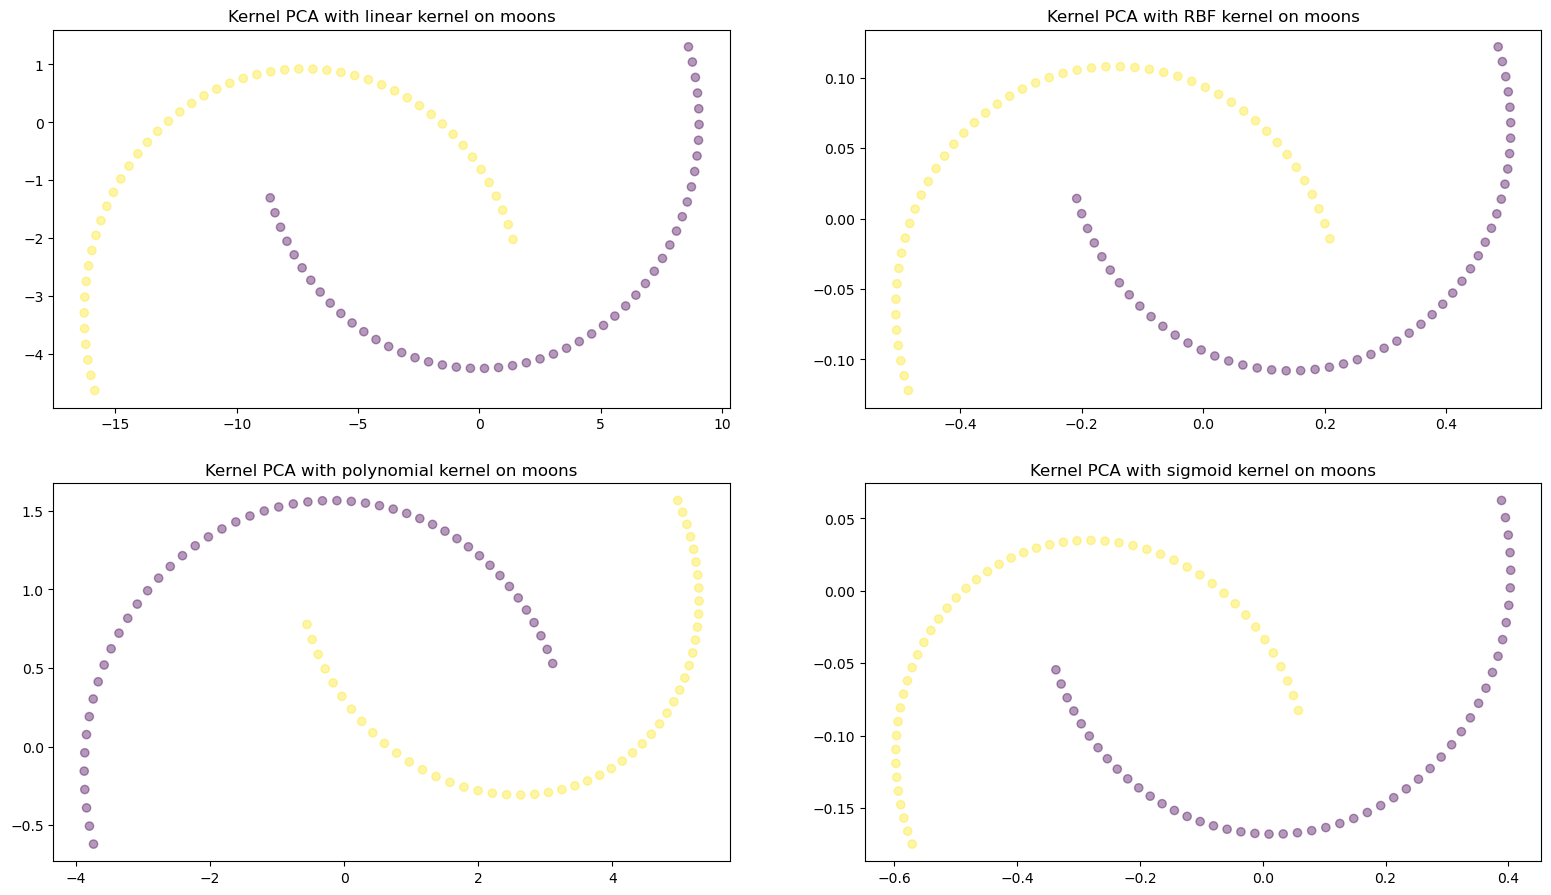

In [6]:
N = 100
X, y = sklearn.datasets.make_moons(N, random_state=42)

X = X[:N]
y = y[:N]
y = np.array(y, dtype=int)

plt.figure(figsize=(19.2, 10.8))

ax = plt.subplot(2,2,1)
sep = "#"*10
print("%s Linear kernel PCA %s" % (sep, sep))
dim_red(X=X, y=y, n_components=2, kernel=pca.linear_kernel, ax=ax, title="Kernel PCA with linear kernel on moons")
print(sep); print()

ax = plt.subplot(2,2,2)
print("%s RBF kernel PCA %s" % (sep, sep))
print("Magnitude of good sigma:", pca.find_sigma(X))
sigma = 4.8
dim_red(X=X, y=y, n_components=2, kernel=pca.radial_based_function(sigma), ax=ax, title="Kernel PCA with RBF kernel on moons")
print(sep); print()

ax = plt.subplot(2,2,3)
print("%s Polynomial kernel PCA %s" % (sep, sep))
gamma = 0.2
r = -1
d = 2
dim_red(X=X, y=y, n_components=2, kernel=pca.polynomial_kernel(gamma,r,d), ax=ax, title="Kernel PCA with polynomial kernel on moons")
print(sep); print()

ax = plt.subplot(2,2,4)
print("%s Sigmoid kernel PCA %s" % (sep, sep))
gamma = 0.1
r = 1
dim_red(X=X, y=y, n_components=2, kernel=pca.sigmoid_kernel(gamma,r), ax=ax, title="Kernel PCA with sigmoid kernel on moons")
print(sep); print()

plt.show()


In [4]:
def dim_red(X, y, n_components, kernel, ax, title):
    model = pca.kPCA(n_components=n_components, kernel=kernel)
    model.fit(X)

    print("2 first eigen values = ", model.eigenvalues.tolist()[:2])
    print("1st eigen value: %.2f%%" % (model.eigenvalues[0] / model.eigenvalues.sum()*100))
    print("2nd eigen value: %.2f%%" % (model.eigenvalues[1] / model.eigenvalues.sum()*100))
    print("variance ratio: ", model.variance_ratio.tolist())

    X_transformed = model.transform(X)
    scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.4, c=y)
    ax.set_title(title)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label("Digit Label")

########## Linear kernel PCA ##########
2 first eigen values =  [134905.945480885, 75964.0088802679]
1st eigen value: 29.18%
2nd eigen value: 16.43%
variance kept with 10 components: 88.09%
##########

########## RBF kernel PCA ##########
Magnitude of good sigma: 10.159746925362475
sigma = 4.8
2 first eigen values =  [7.001095987557729, 3.0466794878315846]
1st eigen value: 32.73%
2nd eigen value: 14.24%
variance kept with 10 components: 80.43%
sigma = 10
2 first eigen values =  [5.209996131660684, 2.8299733369946947]
1st eigen value: 29.98%
2nd eigen value: 16.29%
variance kept with 10 components: 86.76%
##########


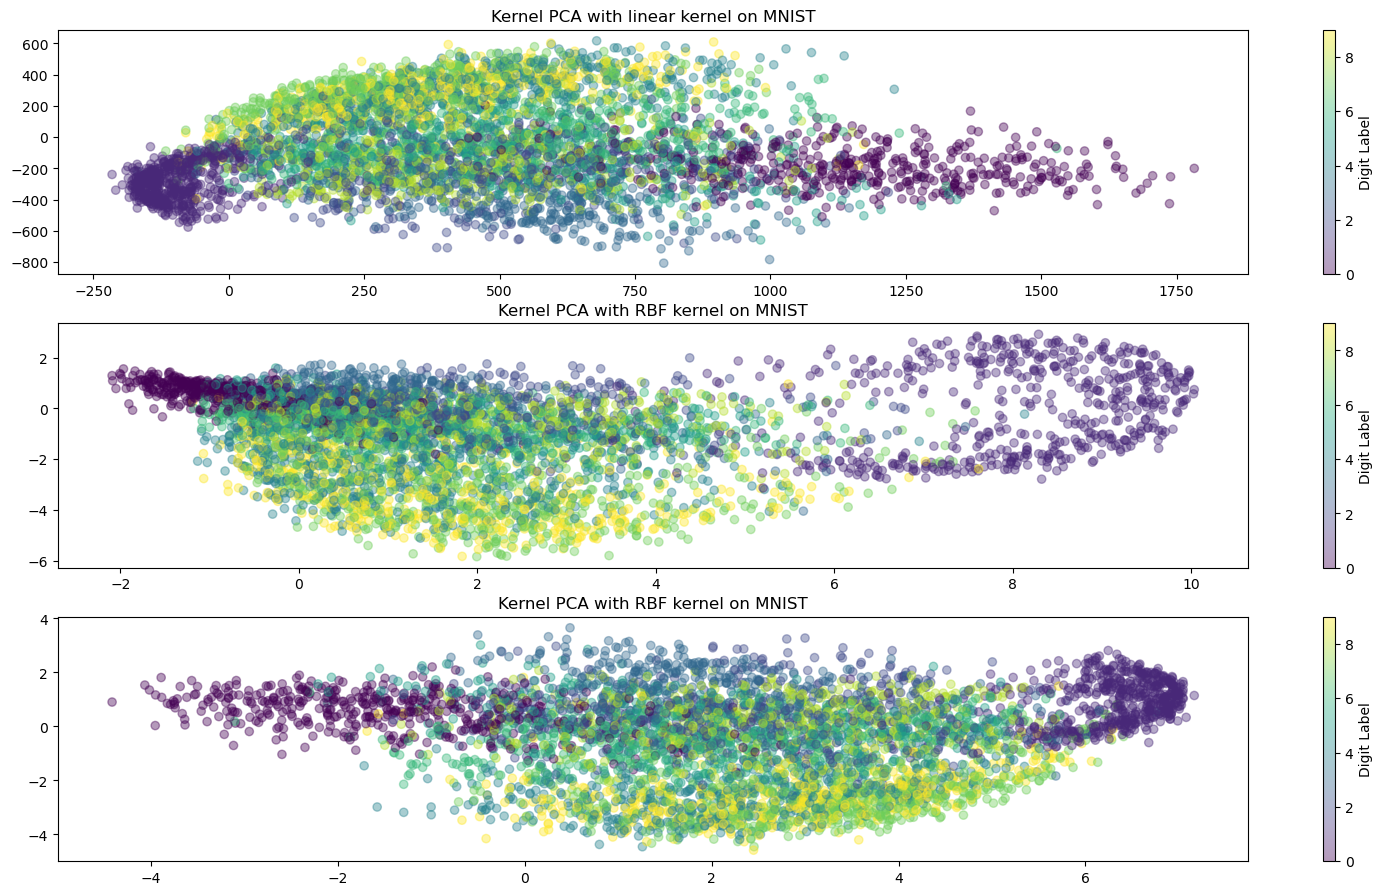

In [14]:
N = 5000
X, y = sklearn.datasets.fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X[:N] / 255.
y = y[:N]
y = np.array(y, dtype=int)

plt.figure(figsize=(19.2, 10.8))

ax = plt.subplot(3,1,1)
sep = "#"*10
print("%s Linear kernel PCA %s" % (sep, sep))
dim_red(X=X, y=y, n_components=2, kernel=pca.linear_kernel, ax=ax, title="Kernel PCA with linear kernel on MNIST")
print(sep); print()
ax = plt.subplot(3,1,2)
print("%s RBF kernel PCA %s" % (sep, sep))
print("Magnitude of good sigma:", pca.find_sigma(X))
sigma = 4.8
print("sigma =", sigma)
dim_red(X=X, y=y, n_components=2, kernel=pca.radial_based_function(sigma), ax=ax, title="Kernel PCA with RBF kernel on MNIST")
ax = plt.subplot(3,1,3)
sigma = 10
print("sigma =", sigma)
dim_red(X=X, y=y, n_components=2, kernel=pca.radial_based_function(sigma), ax=ax, title="Kernel PCA with RBF kernel on MNIST")
print(sep)

plt.show()


########## Linear kernel PCA ##########
2 first eigen values =  [2741860.14285569, 1507279.6889020882]
1st eigen value: 48.65%
2nd eigen value: 26.74%
variance ratio:  [0.4864846857842029, 0.2674346785174582]
##########

########## RBF kernel PCA ##########
Magnitude of good sigma: 14.984683577115597
sigma = 3.5
2 first eigen values =  [2.3869680777828894, 2.0064791751322413]
1st eigen value: 12.55%
2nd eigen value: 10.55%
variance ratio:  [0.12545590082336136, 0.10545790483856918]
sigma = 15
2 first eigen values =  [14.419412760674971, 9.50229853619133]
1st eigen value: 43.70%
2nd eigen value: 28.80%
variance ratio:  [0.43696710806717765, 0.28795846129562747]
##########
########## Sigmoid kernel PCA ##########
sigma = 22
2 first eigen values =  [1.1372787527215886, 0.6192142430092281]
1st eigen value: 54.70%
2nd eigen value: 29.78%
variance ratio:  [0.5470356345989758, 0.29784453069809597]
##########


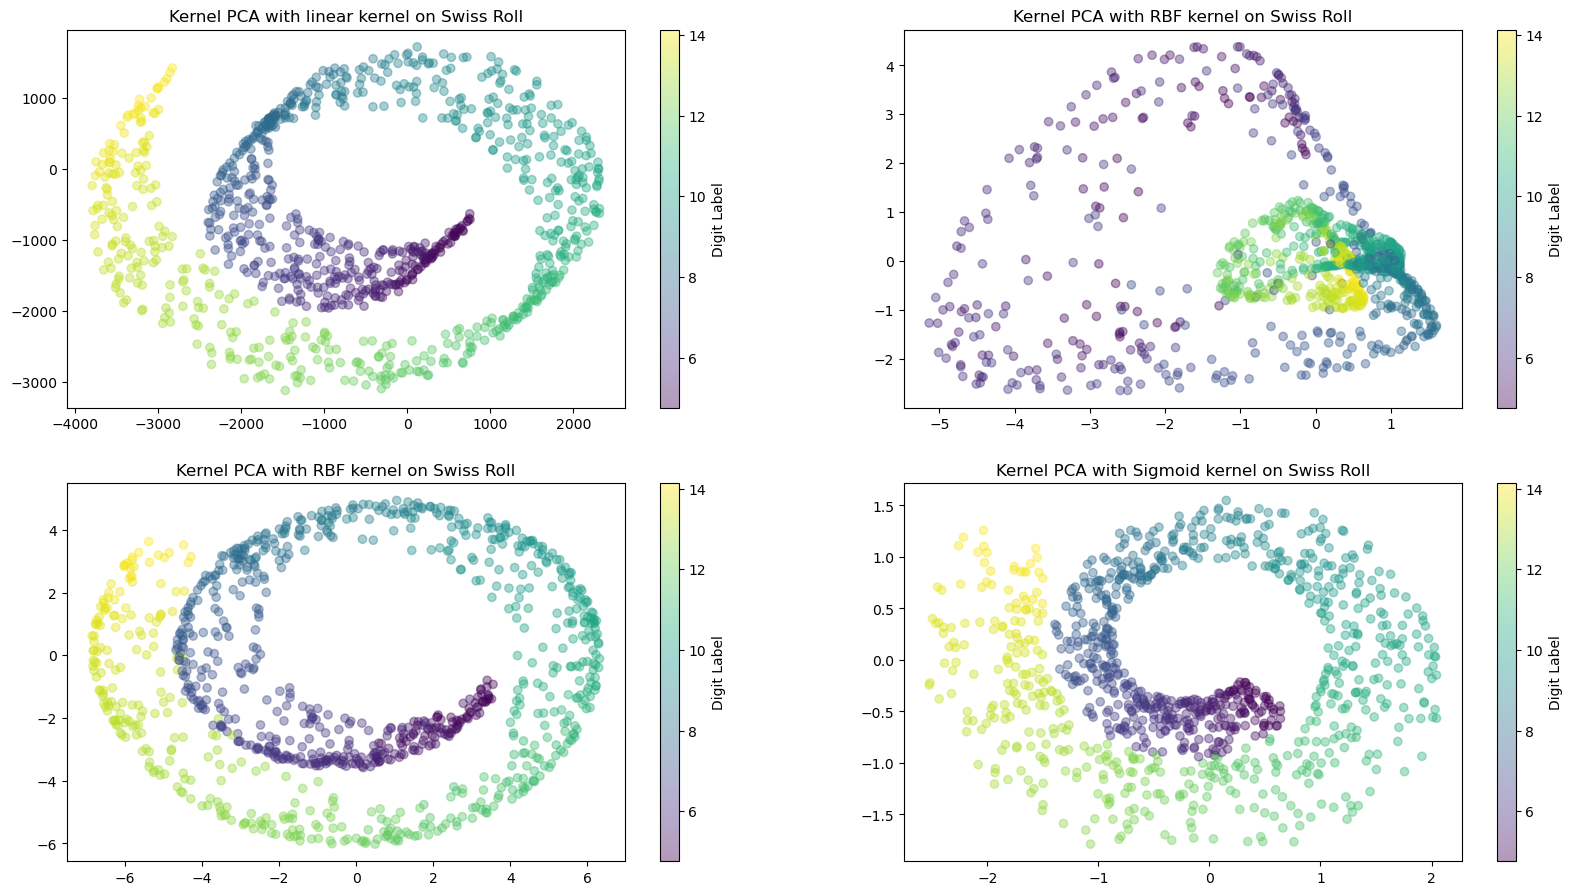

In [5]:
N = 1000
X, y = sklearn.datasets.make_swiss_roll(n_samples=N, noise=0.1, random_state=42)

plt.figure(figsize=(19.8, 10.8))

ax = plt.subplot(2,2,1)
sep = "#"*10
print("%s Linear kernel PCA %s" % (sep, sep))
dim_red(X=X, y=y, n_components=2, kernel=pca.linear_kernel, ax=ax, title="Kernel PCA with linear kernel on Swiss Roll")
print(sep); print()
ax = plt.subplot(2,2,2)
print("%s RBF kernel PCA %s" % (sep, sep))
print("Magnitude of good sigma:", pca.find_sigma(X))
sigma = 3.5
print("sigma =", sigma)
dim_red(X=X, y=y, n_components=2, kernel=pca.radial_based_function(sigma), ax=ax, title="Kernel PCA with RBF kernel on Swiss Roll")
ax = plt.subplot(2,2,3)
sigma = 15
print("sigma =", sigma)
dim_red(X=X, y=y, n_components=2, kernel=pca.radial_based_function(sigma), ax=ax, title="Kernel PCA with RBF kernel on Swiss Roll")
print(sep)
ax = plt.subplot(2,2,4)
print("%s Sigmoid kernel PCA %s" % (sep, sep))
sigma = 22
print("sigma =", sigma)
gamma = pca.get_gamma(sigma)
# gamma = 1e-3
r = 1
dim_red(X=X, y=y, n_components=2, kernel=pca.sigmoid_kernel(gamma=gamma,r=r), ax=ax, title="Kernel PCA with Sigmoid kernel on Swiss Roll")
print(sep)

plt.show()